## Notebook showing a general workflow for the postprocessing analysis for the satay pipeline 

In [1]:

import os, sys
import warnings
import timeit
import numpy as np
import pandas as pd 


from transposonmapper.processing.clean_bedwigfiles import cleanfiles
from transposonmapper.processing.transposonread_profileplot_genome import profile_genome
from transposonmapper.processing.genomicfeatures_dataframe import dna_features
from transposonmapper.statistics import volcano




In [2]:
wig_files=[]
bed_files=[]
pergene_files=[]
#data_dir= "../satay/data_files/data_unmerged/"
#data_dir="../transposonmapper/data_files/files4test/"
data_dir="../data/"
#data_dir="../transposonmapper/data_files/"
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.endswith("sorted.bam.wig"):
            wig_files.append(os.path.join(root, file))
        elif file.endswith("sorted.bam.bed"):
             bed_files.append(os.path.join(root, file))
        elif file.endswith('sorted.bam_pergene_insertions.txt'):
            pergene_files.append(os.path.join(root, file))






### Clean the wig and bed files generated by transposon mapper (it is ok if run in spyder)

In [3]:
## clean wig files for proper visualization in the genome Browser http://genome-euro.ucsc.edu/cgi-bin/hgGateway
custom_header = ""
split_chromosomes = False
for files in zip(wig_files,bed_files):
    cleanfiles(filepath=files[0], custom_header=custom_header, split_chromosomes=split_chromosomes)
    cleanfiles(filepath=files[1], custom_header=custom_header, split_chromosomes=split_chromosomes)


Wig file loaded ../data/bem1-aid_a/yWT03a_16_merged_cleaned_forward_reads_trimmed.sorted.bam.wig
evaluating chromosome I
evaluating chromosome II
evaluating chromosome III
evaluating chromosome IV
evaluating chromosome V
evaluating chromosome VI
evaluating chromosome VII
evaluating chromosome VIII
evaluating chromosome IX
evaluating chromosome X
evaluating chromosome XI
evaluating chromosome XII
evaluating chromosome XIII
evaluating chromosome XIV
evaluating chromosome XV
evaluating chromosome XVI
Bed file loaded ../data/bem1-aid_a/yWT03a_16_merged_cleaned_forward_reads_trimmed.sorted.bam.bed
evaluating chromosome I
evaluating chromosome II
evaluating chromosome III
evaluating chromosome IV
evaluating chromosome V
evaluating chromosome VI
evaluating chromosome VII
evaluating chromosome VIII
evaluating chromosome IX
evaluating chromosome X
evaluating chromosome XI
evaluating chromosome XII
evaluating chromosome XIII
evaluating chromosome XIV
evaluating chromosome XV
evaluating chromosom

In [4]:
cleanbed_files=[]
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.endswith("clean.bed"):
            cleanbed_files.append(os.path.join(root, file))

cleanwig_files=[]
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.endswith("clean.wig"):
            cleanwig_files.append(os.path.join(root, file))

In [7]:
#transposonread_profileplot_genome.py (to check the insertion and read distribution throughout the genome)
#example of file to analyse with profile_genome
# bed_file=cleanbed_files[0]
variable="transposons" #"reads" "transposons"
bar_width=None
savefig=True

for bed_file in cleanbed_files:

    profile=profile_genome(bed_file=bed_file, variable=variable, bar_width=bar_width, savefig=savefig,showfig=True)



Genome length:  12071326
Reading file : /data/localhome/linigodelacruz/Documents/PhD_2018/Documentation/SATAY/src(source-code)/Transposonmapper/transposonmapper/data_files/Cerevisiae_AllEssentialGenes_List.txt
Reading file : /data/localhome/linigodelacruz/Documents/PhD_2018/Documentation/SATAY/src(source-code)/Transposonmapper/transposonmapper/data_files/Cerevisiae_AllEssentialGenes_List.txt
saving figure at ../data/bem1-aid_a/yWT03a_16_merged_cleaned_forward_reads_trimmed.sorted.bam_clean_transposonplot_genome.png
Genome length:  12071326
Reading file : /data/localhome/linigodelacruz/Documents/PhD_2018/Documentation/SATAY/src(source-code)/Transposonmapper/transposonmapper/data_files/Cerevisiae_AllEssentialGenes_List.txt
Reading file : /data/localhome/linigodelacruz/Documents/PhD_2018/Documentation/SATAY/src(source-code)/Transposonmapper/transposonmapper/data_files/Cerevisiae_AllEssentialGenes_List.txt
saving figure at ../data/dbem1dbem3_a/yTW001_4_merged_cleaned_forward_reads_trimmed.

Selected region:  I
Chromosome length =  230218
Everything alright, just ignore me!


,Feature_name,Standard_name,Feature_alias,Feature_type,Essentiality,Chromosome,Position,Nbasepairs,Ninsertions,Ninsertions_truncatedgene,Nreads,Nreads_list,Nreads_truncatedgene,Nreadsperinsrt,Nreadsperinsrt_truncatedgene
0,noncoding,noncoding,,None,None,I,"[0, 1]",2,0,0,0,[0.0],0,0.000000,0.000000
1,TEL01L,TEL01L,,Telomere,None,I,"[2, 335]",334,5,5,33,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",33,8.250000,6.600000
2,YAL069W,YAL069W,,Gene; Dubious,False,I,"[336, 650]",315,8,2,251,"[0.0, 0.0, 0.0, 0.0, 7.0, 0.0, 0.0, 0.0, 0.0, ...",20,35.857143,0.000000
3,TEL01L,TEL01L,,Telomere,None,I,"[651, 707]",57,0,0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,0.000000,0.000000
4,ARS102,ARS102,,ARS,None,I,"[708, 776]",69,0,0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,YAR071W,PHO11,,Gene; Verified,False,I,"[225461, 226864]",1404,13,13,110,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",110,9.166667,8.461538
238,noncoding,noncoding,,None,None,I,"[226865, 227742]",878,0,0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,0.000000,0.000000
239,YAR073W,IMD1,,Gene; Dubious,False,I,"[227743, 228844]",1102,10,8,81,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",74,9.000000,9.250000
240,YAR075W,YAR075W,,Gene; Dubious,False,I,"[228845, 229318]",474,1,0,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,0.000000,0.000000


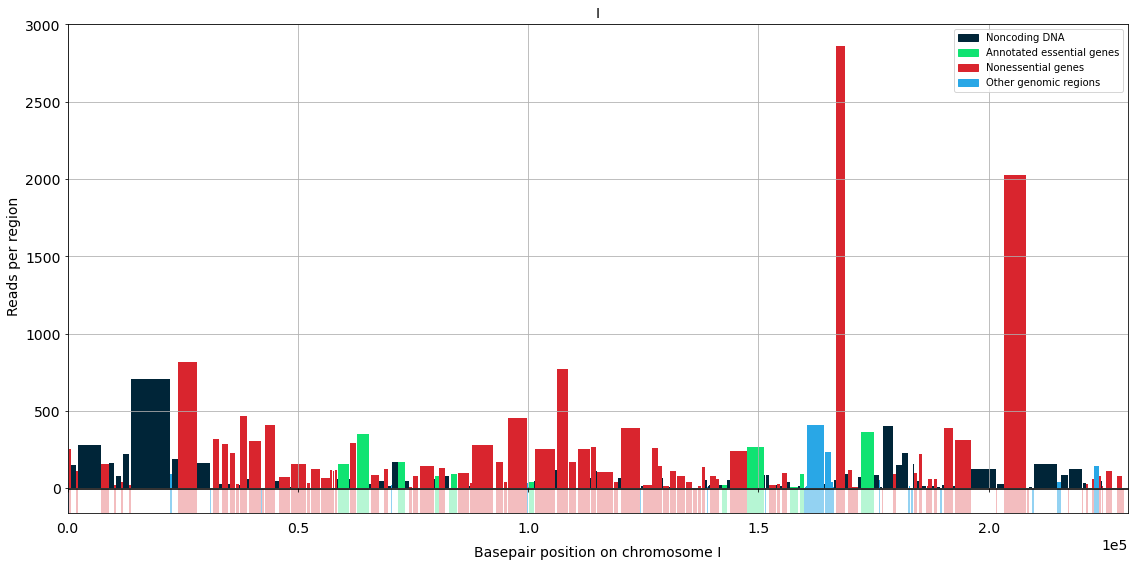

In [8]:
# genomic features 
i=0
wig_file = cleanwig_files[i]
pergene_insertions_file = pergene_files[i]
plotting=True
variable="reads" #"reads" or "insertions"
savefigure=False
verbose=True

   
region = "I" #e.g. 1, "I", ["I", 0, 10000"], gene name (e.g. "CDC42")
dna_features(region=region,
                wig_file=wig_file,
                pergene_insertions_file=pergene_insertions_file,
                variable=variable,
                plotting=plotting,
                savefigure=savefigure,
                verbose=verbose)


In [23]:
# genomic features 
# i=0

for i in range(len(cleanwig_files)):
    wig_file = cleanwig_files[i]
    pergene_insertions_file = pergene_files[i]
    plotting=False
    variable="reads" #"reads" or "insertions"
    savefigure=False
    verbose=True

    dna_df2=[]
    for chrom in ['I', 'II', 'III', 'IV','V', 'VI', 'VII', 'VIII', 'IX', 'X', 'XI', 'XII', 'XIII', 'XIV', 'XV', 'XVI']:
    #     region=chrom
    
        region = chrom #e.g. 1, "I", ["I", 0, 10000"], gene name (e.g. "CDC42")
        dna_df2.append(dna_features(region=region,
                    wig_file=wig_file,
                    pergene_insertions_file=pergene_insertions_file,
                    variable=variable,
                    plotting=plotting,
                    savefigure=savefigure,
                    verbose=verbose))
    data_genome=pd.concat(dna_df2, axis=0,ignore_index=True)
    data_genome.to_excel('../postprocessed-data/'+ cleanwig_files[i].split("/")[-1].split("_merged")[0] + ".xlsx",engine='openpyxl')

Selected region:  I
Chromosome length =  230218
Everything alright, just ignore me!
Selected region:  II
Chromosome length =  813184
Everything alright, just ignore me!
Selected region:  III
Chromosome length =  316620
Everything alright, just ignore me!
Selected region:  IV
Chromosome length =  1531933
Everything alright, just ignore me!
Selected region:  V
Chromosome length =  576874
Everything alright, just ignore me!
Selected region:  VI
Chromosome length =  270161
Everything alright, just ignore me!
Selected region:  VII
Chromosome length =  1090940
Everything alright, just ignore me!
Selected region:  VIII
Chromosome length =  562643
Everything alright, just ignore me!
Selected region:  IX
Chromosome length =  439888
Everything alright, just ignore me!
Selected region:  X
Chromosome length =  745751
Everything alright, just ignore me!
Selected region:  XI
Chromosome length =  666816
Everything alright, just ignore me!
Selected region:  XII
Chromosome length =  1078177
Everything 

In [20]:
cleanwig_files[0].split("/")[-1].split("_merged")[0]

'yWT03a_16'

In [ ]:
plotting=False
variable="reads" #"reads" or "insertions"
savefigure=False
verbose=True

dna_df2=[]
data_genome=[]
for files_wig,files_pergene in zip(cleanwig_files,pergene_files):
    
    for chrom in ['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX', 'X', 'XI', 'XII', 'XIII', 'XIV', 'XV', 'XVI']:
#     region=chrom
   
        region = chrom #e.g. 1, "I", ["I", 0, 10000"], gene name (e.g. "CDC42")
        dna_df2.append(dna_features(region=region,
                    wig_file=files_wig,
                    pergene_insertions_file=files_pergene,
                    variable=variable,
                    plotting=plotting,
                    savefigure=savefigure,
                    verbose=verbose))
    data_genome.append(pd.concat(dna_df2, axis=0,ignore_index=True))

Reading file : /data/localhome/linigodelacruz/Documents/PhD_2018/Documentation/SATAY/src(source-code)/Transposonmapper/transposonmapper/data_files/Cerevisiae_AllEssentialGenes_List.txt
Reading file : /data/localhome/linigodelacruz/Documents/PhD_2018/Documentation/SATAY/src(source-code)/Transposonmapper/transposonmapper/data_files/Cerevisiae_AllEssentialGenes_List.txt
Reading file : /data/localhome/linigodelacruz/Documents/PhD_2018/Documentation/SATAY/src(source-code)/Transposonmapper/transposonmapper/data_files/Cerevisiae_AllEssentialGenes_List.txt
Reading file : /data/localhome/linigodelacruz/Documents/PhD_2018/Documentation/SATAY/src(source-code)/Transposonmapper/transposonmapper/data_files/Cerevisiae_AllEssentialGenes_List.txt
Plotting: read_per_gene
saving figure at __volcano_plot_reads.png


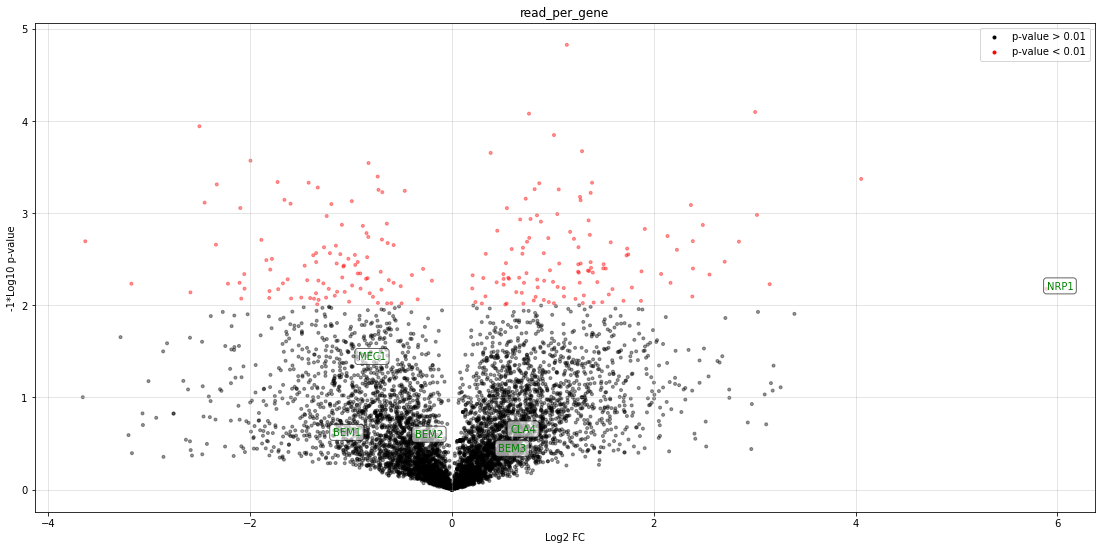

In [13]:
# volcano plots

path_a = r"../transposonmapper/data_files/files4test/"
filelist_a = ["WT_merged-DpnII-NlaIII-a_trimmed.sorted.bam_pergene.txt", "WT_merged-DpnII-NlaIII-b_trimmed.sorted.bam_pergene.txt"]
path_b = r"../transposonmapper/data_files/files4test/"
filelist_b = ["dnrp1-1_merged-DpnII-NlaIII-a_trimmed.sorted.bam_pergene.txt", "dnrp1-1_merged-DpnII-NlaIII-b_trimmed.sorted.bam_pergene.txt"]


variable = 'read_per_gene' #'read_per_gene' 'tn_per_gene', 'Nreadsperinsrt'
significance_threshold = 0.01 #set threshold above which p-values are regarded significant
normalize=True
savefig=True

trackgene_list = []
# trackgene_list = ['nrp1']
trackgene_list = [ 'bem1', 'bem2', 'bem3', 'nrp1',  'cla4', 'mec1']
# trackgene_list = ['ymr320w','sut1','ymr242w-a','ypl135c-a','ppn1','ypl067c','yme1','mec1','nrp1','mss18','tma7','gef1']

figure_title = ""

volcano_df = volcano(path_a=path_a, filelist_a=filelist_a,
            path_b=path_b, filelist_b=filelist_b,
            variable=variable,
            significance_threshold=significance_threshold,
            normalize=normalize,
            trackgene_list=trackgene_list,
            figure_title=figure_title,savefig=savefig)

In [14]:
savepath_a = os.path.splitext(filelist_a[0])
savepath_b=os.path.splitext(filelist_b[0])

In [20]:
savepath_a[0] + '_' + savepath_b[0]

'WT_merged-DpnII-NlaIII-a_trimmed.sorted.bam_pergene_dnrp1-1_merged-DpnII-NlaIII-a_trimmed.sorted.bam_pergene'